## 1. Imports

In [1]:
import pandas as pd
import numpy as np
from pymove import MoveDataFrame
from pymove.visualization.visualization import heatmap, heatmap_with_time, plot_trajectory_by_id_with_folium,  plot_trajectories_with_folium, faster_cluster, cluster,  show_lat_lon_GPS,  show_object_id_by_date

---
## 2. Load Data

In [2]:
df = pd.read_csv('examples/geolife_sample.csv', parse_dates=['datetime'])
df.head()

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984217,116.319422,2008-10-23 05:53:21,1


In [3]:
move_df = MoveDataFrame(data=df, latitude="lat", longitude="lon", datetime="datetime")

In [15]:
print(move_df)

,lat,lon,datetime,id,day
0,39.984094,116.319236,2008-10-23 05:53:05,1,Thursday
1,39.984198,116.319322,2008-10-23 05:53:06,1,Thursday
2,39.984224,116.319402,2008-10-23 05:53:11,1,Thursday
3,39.984211,116.319389,2008-10-23 05:53:16,1,Thursday
4,39.984217,116.319422,2008-10-23 05:53:21,1,Thursday


In [5]:
from pymove.visualization import visualization

In [8]:
visualization.generate_color()

'#DC143C'

In [14]:
move_df['tid'][0]

'12008102305'

In [18]:
visualization.plot_trajectory_by_day_week(move_df, 'Sunday')

In [22]:
visualization.plot_trajectory_by_period(move_df, 'evening')

## 3. Visualizations

### 3.1. HeatMap with Folium

In [ ]:
heatmap(move_df, 10000)

### 3.2. Plot all trajectories

In [ ]:
plot_trajectories_with_folium(move_df, n_rows=10000)

### 3.3. Plot trajectory by id

In [ ]:
plot_trajectory_by_id_with_folium(move_df, 1, color="#FFF")

### 3.4. Cluster

In [ ]:
cluster(move_df, 100)

### 3.5. Faster Cluster

In [ ]:
faster_cluster(move_df, 100)

### 3.6. Show trajectory by id

In [ ]:
move_df.plot_traj_id(move_df['tid'][0])

In [ ]:
folium.Re

### 3.7. Show lat,lon GPS

In [ ]:
show_lat_lon_GPS(move_df)

### 3.8. Show object id by date

Creating date features...
..Date features was created...


Creating or updating a feature for hour...

...Hour feature was created...


Creating or updating period feature
...early morning from 0H to 6H
...             morning from 6H to 12H
...afternoon from 12H to 18H
...evening from 18H to 24H
...the period of day feature was created

Creating or updating day of the week feature...

...the day of the week feature was created...



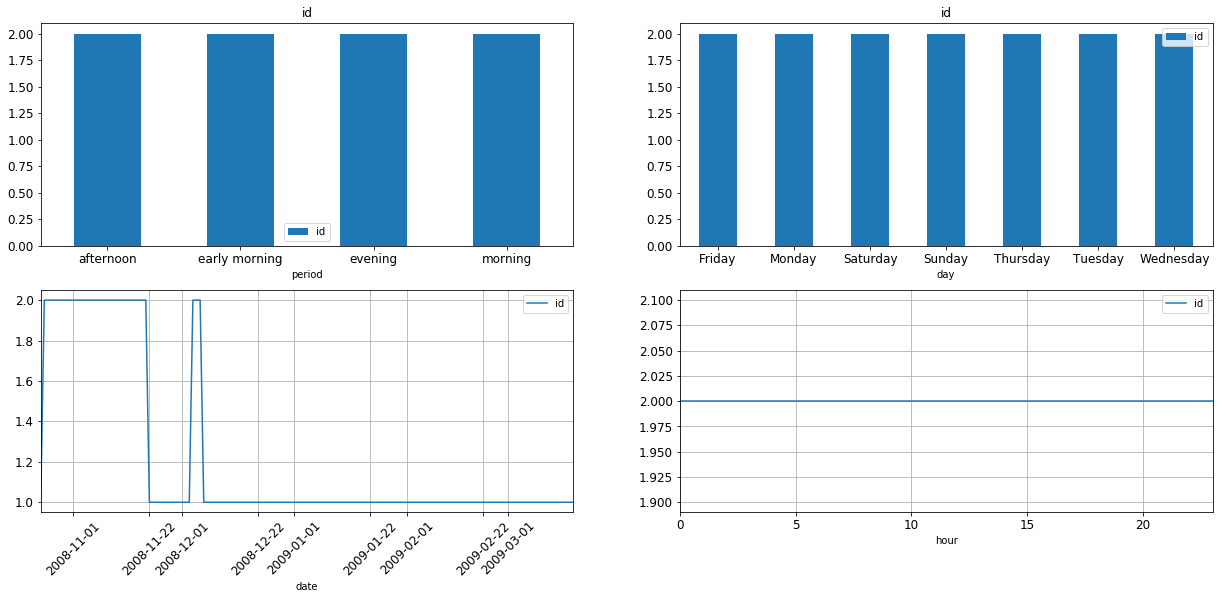

In [19]:
show_object_id_by_date(move_df)

In [73]:
base_map = visualization.create_base_map([39.984094, 116.319236])
base_map

In [74]:
stops = move_df.loc[:5, ['lat', 'lon']]

In [75]:
import folium
for stop in stops.iterrows():
    print(stop[1]['lat'])
    base_map.add_child(folium.Circle([stop[1]['lat'], stop[1]['lon']], color=visualization.generate_color(), weight=3, radius=20, opacity=0.5,
                                        popup = "Stop",
                                      fill_color=visualization.generate_color(),
                                      fill_opacity=0.5,))

39.984094
39.984198
39.984224
39.984211
39.984217
39.98471


In [76]:
base_map